In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
    

600

In [3]:
cities

['yellowknife',
 'kuopio',
 'hofn',
 'mataura',
 'rikitea',
 'tekkali',
 'punta arenas',
 'bambous virieux',
 'atuona',
 'geraldton',
 'chokurdakh',
 'lake havasu city',
 'busselton',
 'saskylakh',
 'taolanaro',
 'jamestown',
 'pontalina',
 'hilo',
 'tiksi',
 'krasnoselkup',
 'cape town',
 'ambon',
 'half moon bay',
 'santa isabel do rio negro',
 'avera',
 'moose factory',
 'torbay',
 'kaitangata',
 'faro',
 'hermanus',
 'george town',
 'mar del plata',
 'ribeira grande',
 'teguise',
 'coihueco',
 'gigmoto',
 'bluff',
 'cherskiy',
 'shache',
 'nanchang',
 'port alfred',
 'avarua',
 'tura',
 'east london',
 'saleaula',
 'mergui',
 'kapaa',
 'pacific grove',
 'qaanaaq',
 'provideniya',
 'whitehorse',
 'tsihombe',
 'sao filipe',
 'vaini',
 'ushuaia',
 'bougouni',
 'bethel',
 'clyde river',
 'hasaki',
 'kalvarija',
 'whitehaven',
 'vestmanna',
 'saldanha',
 'grindavik',
 'santa eulalia del rio',
 'lolua',
 'grand gaube',
 'bredasdorp',
 'rio rancho',
 'cagliliog',
 'nikolskoye',
 'belushya

In [13]:
#get data for all cities randomly selected

url='https://api.openweathermap.org/data/2.5/weather?'

query_url=f'{url}appid={api_key}&units=imperial&q='

latitudes=[]
max_temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

for city in cities:
    try:
        response=requests.get(query_url+city).json()
        latitudes.append(response['coord']['lat'])
        max_temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print("N/A")

N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A


In [14]:
weather_df=pd.DataFrame({
    "latitude":latitudes,
    "max_temp":max_temperature,
    "humidity":humidity,
    "cloudiness":cloudiness,
    "wind_speed":wind_speed
})

weather_df

,latitude,max_temp,humidity,cloudiness,wind_speed
0,62.45,-5.80,76,40,6.93
1,62.89,30.20,74,5,13.87
2,64.25,31.59,65,100,10.87
3,-46.19,54.00,64,35,15.99
4,-23.12,79.14,78,94,12.19
5,18.62,71.51,80,71,1.86
6,-53.16,50.00,66,97,5.82
7,-20.34,77.00,94,75,2.24
8,-9.80,80.44,73,0,15.73
9,49.72,15.80,85,90,2.13


In [12]:
weather_df.to_csv("cities.csv", index=False)

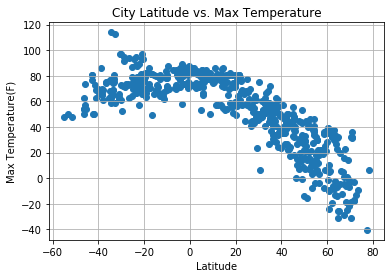

In [15]:
plt.scatter(weather_df["latitude"],weather_df["max_temp"],marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemperatureInWorldCities.png")

plt.show()

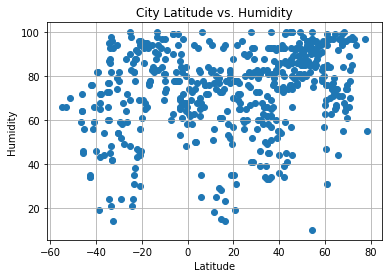

In [16]:
plt.scatter(weather_df["latitude"],weather_df["humidity"],marker="o")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("HumidityInWorldCities.png")

plt.show()

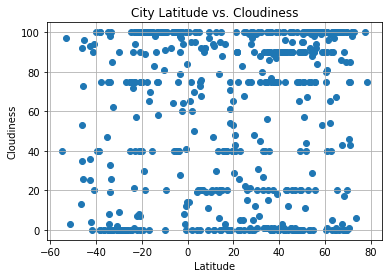

In [17]:
plt.scatter(weather_df["latitude"],weather_df["cloudiness"],marker="o")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CloudinessInWorldCities.png")

plt.show()

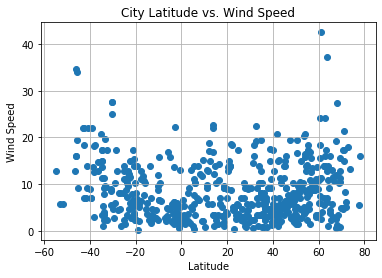

In [18]:
plt.scatter(weather_df["latitude"],weather_df["wind_speed"],marker="o")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeedInWorldCities.png")

plt.show()